In [168]:
photo_bath = np.array(photo_bath,dtype='float32')
photo_bed = np.array(photo_bed,dtype='float32')
photo_front = np.array(photo_front,dtype='float32')
photo_kitch = np.array(photo_kitch,dtype='float32')

In [169]:
bath_train, bath_test, price_train, price_test = train_test_split(photo_bath , price, test_size=0.33, shuffle=False )
bed_train, bed_test, price_train, price_test = train_test_split(photo_bed , price, test_size=0.33, shuffle=False )
front_train, front_test, price_train, price_test = train_test_split(photo_front , price, test_size=0.33, shuffle=False )
kitch_train, kitch_test, price_train, price_test = train_test_split(photo_kitch , price, test_size=0.33, shuffle=False )

ValueError: ignored

In [170]:
from numpy import asarray
import tensorflow as tf
from tensorflow.keras.utils import img_to_array, plot_model
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Concatenate, MaxPool2D, Flatten, Dense
import glob
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [171]:
data = pd.read_csv("/content/drive/MyDrive/house_table.txt", header=None, sep = " ")
price = data.iloc[:,-1:]
price = price.values

In [172]:
input_images_list = []

In [173]:
for housepath in glob.glob('/content/drive/MyDrive/Houses/*.jpg'):
  image = cv2.imread(housepath) #verileri okuyoruz
  res_image = cv2.resize(image,(300,300),cv2.INTER_AREA) #verilerin pixellerini resize ediyoruz
  input_images_list.append(res_image) #verilerimizi input images'e ekliyoruz
  

In [174]:
 input_images = np.array(input_images_list).reshape((535,4,300,300,3))

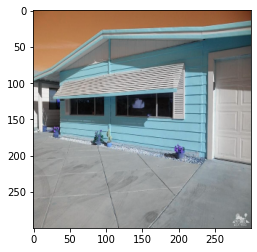

In [175]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgplot = plt.imshow(input_images[6,0])


In [176]:
images_train, images_test, price_train, price_test = train_test_split(input_images , price, test_size=0.33)

In [178]:
photo_bath = []
photo_bed = []
photo_front = []
photo_kitch = []

#fotoğrafları bölümlerine göre 4'e ayırdım ve yukarıda oluşturduğum boş listeye attım
for i in range(len(images_train)):
  photo_bath.append(images_train[i,0])
  photo_bed.append(images_train[i,1])
  photo_front.append(images_train[i,2])
  photo_kitch.append(images_train[i,3])

bath_train = np.array(photo_bath)
bed_train = np.array(photo_bed)
front_train = np.array(photo_front)
kitch_train = np.array(photo_kitch)

In [ ]:
photo_front.shape

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgplot = plt.imshow(images_train[3,0])

In [ ]:
photo_bath.shape

##Model

In [202]:
input_train_1 = {"bath" : bath_train, "bed" : bed_train, "front" : front_train, "kitch" : kitch_train }
input_train = [bath_train,bed_train,kitch_train,front_train]

In [203]:
input_bath = Input(shape = (300,300,3),name="bath")
input_bed = Input(shape = (300,300,3),name="bed")
input_front = Input(shape = (300,300,3),name="front")
input_kitch = Input(shape = (300,300,3),name="kitch")

In [208]:
input_con_list = [input_bath,input_bed,input_kitch]
input_con = tf.keras.layers.Concatenate(axis=-1)(input_con_list)
input_layer = [input_con_list,input_front]

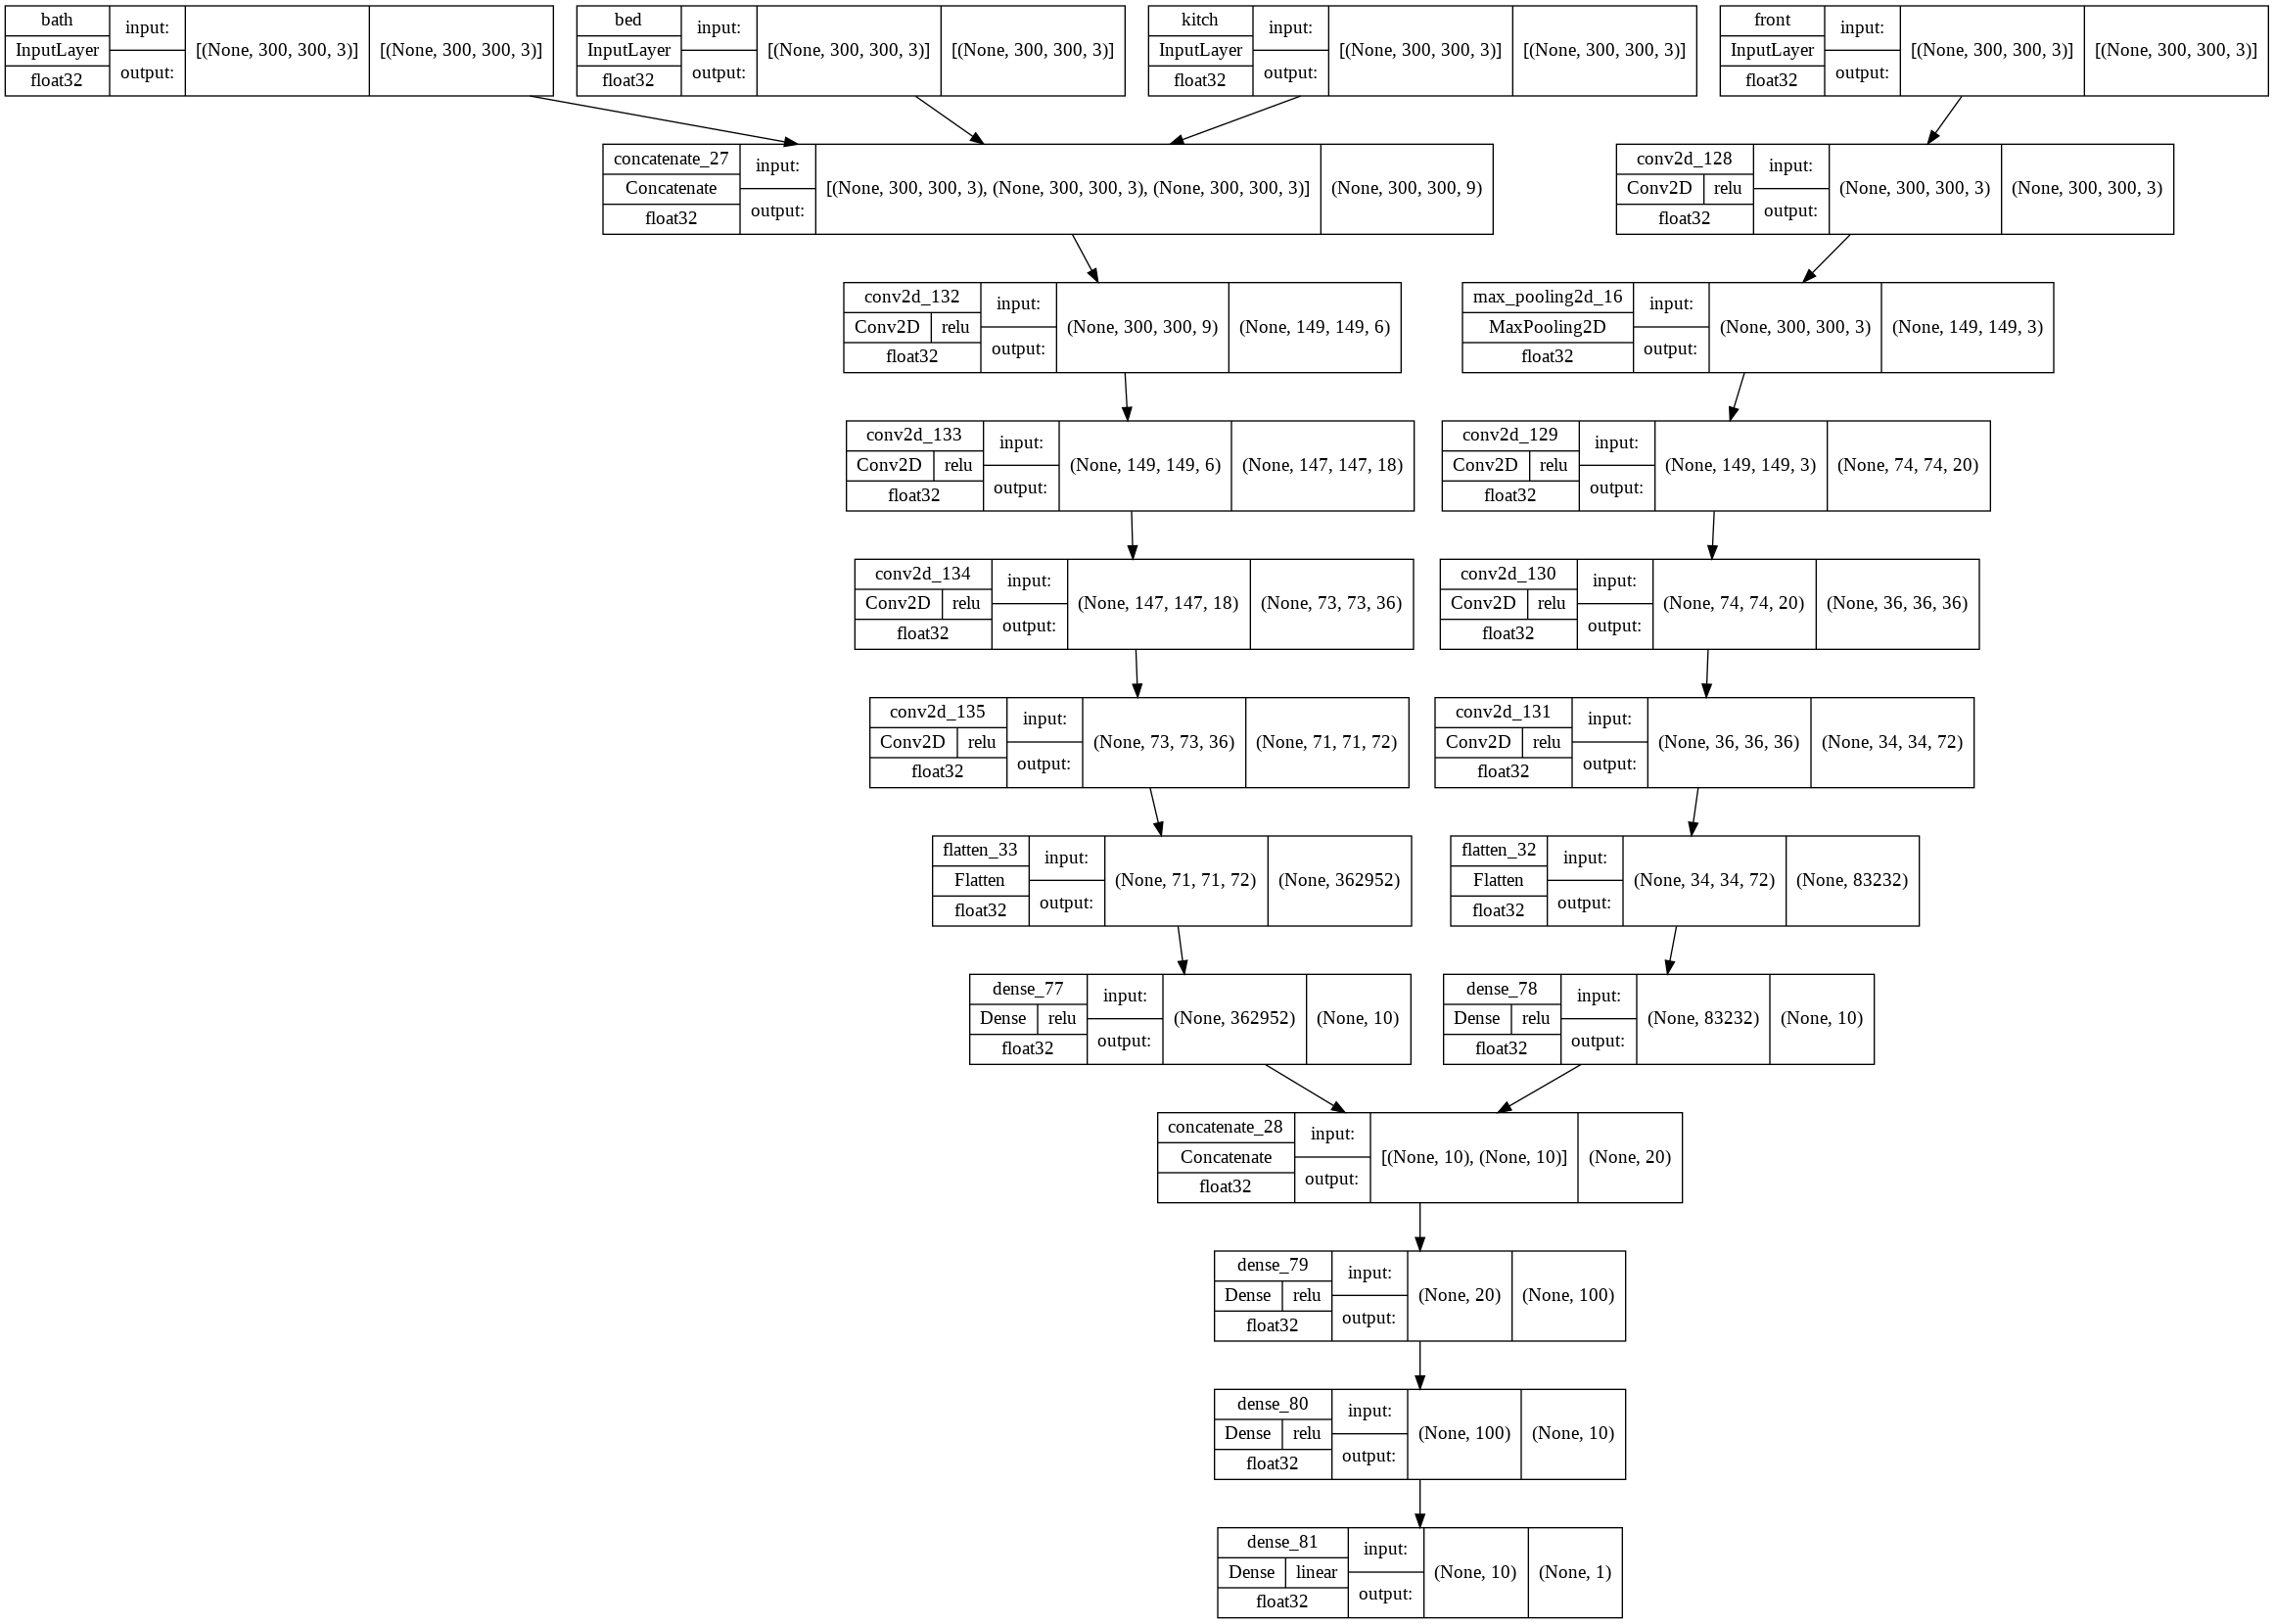

In [209]:
l1_front = Conv2D(
    filters = 3,
    kernel_size = 3,
    strides = (1, 1),
    padding = 'same', activation="relu")(input_front)

max_front = MaxPool2D(
    pool_size=(3, 3),
    strides=(2,2),
    padding='valid')(l1_front)



l2_front = Conv2D(
    filters = 20,
    kernel_size = 3,
    strides = (2, 2),
    padding = 'valid', activation="relu")(max_front)


l3_front = Conv2D(
    filters = 36,
    kernel_size = 3,
    strides = (2, 2),
    padding = 'valid', activation="relu")(l2_front)

l4_front = Conv2D(
    filters = 72,
    kernel_size = 3,
    strides = (1, 1),
    padding = 'valid', activation="relu")(l3_front)



flatten_5 = Flatten()(l4_front)





l1 = Conv2D(
    filters = 6,
    kernel_size = 3,
    strides = (2, 2),
    padding = 'valid', activation="relu")(input_con)

l2 = Conv2D(
    filters = 18,
    kernel_size = 3,
    strides = (1, 1),
    padding = 'valid', activation="relu")(l1)


l3 = Conv2D(
    filters = 36,
    kernel_size = 3,
    strides = (2, 2),
    padding = 'valid', activation="relu")(l2)

l4 = Conv2D(
    filters = 72,
    kernel_size = 3,
    strides = (1, 1),
    padding = 'valid', activation="relu")(l3)






flatten_8 = Flatten()(l4)



dense_layer_other = Dense(10, activation="relu")(flatten_8)

dense_layer_front = Dense(10, activation="relu")(flatten_5)

con_layer_1 = Concatenate()([dense_layer_other,dense_layer_front])

dense_layer_1 = Dense(100, activation="relu")(con_layer_1)

dense_layer_2 = Dense(10, activation="relu")(dense_layer_1)

dense_layer_3 = Dense(1, activation="linear")(dense_layer_2)

model = Model(input_layer,dense_layer_3)

plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    dpi=96,
    layer_range=None,
    show_layer_activations=True)

In [210]:
model.compile(optimizer="adam",
              loss=("MeanAbsoluteError","MeanAbsoluteError"),
              metrics=("mean_absolute_error"))

In [ ]:
model.fit(x = input_train, y = price_train,
          batch_size=10,
          epochs=10)

Epoch 1/10
36/36 [==============================] - 22s 546ms/step - loss: 463078.1250 - mean_absolute_error: 463078.1250
Epoch 2/10
36/36 [==============================] - 17s 474ms/step - loss: 338626.0000 - mean_absolute_error: 338626.0000
Epoch 3/10
36/36 [==============================] - 17s 476ms/step - loss: 339304.1562 - mean_absolute_error: 339304.1562
Epoch 4/10
36/36 [==============================] - 17s 476ms/step - loss: 355171.5000 - mean_absolute_error: 355171.5000
Epoch 5/10
36/36 [==============================] - 17s 475ms/step - loss: 335986.0625 - mean_absolute_error: 335986.0625
Epoch 6/10
36/36 [==============================] - 17s 475ms/step - loss: 336854.9062 - mean_absolute_error: 336854.9062
Epoch 7/10
36/36 [==============================] - 17s 486ms/step - loss: 342843.1562 - mean_absolute_error: 342843.1562
Epoch 8/10
36/36 [==============================] - 17s 478ms/step - loss: 339113.5312 - mean_absolute_error: 339113.5312
Epoch 9/10
36/36 [======